<a href="https://colab.research.google.com/github/always-newbie161/probml-notebooks/blob/lfs_git/notebooks/git_lfs_colab_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook shows a demo of using a colab to saving and loading data using **[git large file storage](https://git-lfs.github.com/)**

**Pre-Remarks:**


*   The remote repo being used (which is cloned) should **not be a public fork** (see this [issue](https://github.com/git-lfs/git-lfs/issues/1906))

*  Github offers a free-pack with only 1gb of bandwidth and storage, so its better not to do tests multiple times and with large objects. This demo only uses a ~100mb(to point the fact that github doesn't allow >100mb files) model to store, so that your free pack wil not be affected much
So If you want to use LFS regularly, its better to buy a datapack from github billing-plans


*   This colab uses SSH to authenticate git, it requires your ssh files(rsa, rsa.pub known_hosts) in your drive in a folder named `ssh`.(If not present, you can follow the instructions mentioned in this [colab_intro](https://colab.research.google.com/github/probml/pyprobml/blob/master/notebooks/colab_intro.ipynb#scrollTo=yaISmcnNmnS7&line=3&uniqifier=1) to upload them)



## LFS Installation

In [ ]:
!curl -s https://packagecloud.io/install/repositories/github/git-lfs/script.deb.sh | sudo bash

Detected operating system as Ubuntu/bionic.
Checking for curl...
Detected curl...
Checking for gpg...
Detected gpg...
Running apt-get update... done.
Installing apt-transport-https... done.
Installing /etc/apt/sources.list.d/github_git-lfs.list...done.
Importing packagecloud gpg key... done.
Running apt-get update... done.

The repository is setup! You can now install packages.


In [ ]:
!sudo apt-get install git-lfs

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  git-lfs
0 upgraded, 1 newly installed, 0 to remove and 58 not upgraded.
Need to get 6,229 kB of archives.
After this operation, 14.5 MB of additional disk space will be used.
Get:1 https://packagecloud.io/github/git-lfs/ubuntu bionic/main amd64 git-lfs amd64 2.13.3 [6,229 kB]
Fetched 6,229 kB in 0s (17.4 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package git-lfs.
(Reading database ... 160819 files and directo

## Cloning the repo

In [ ]:
# Replace them with your personal credentials.
email = "srikarreddy38@gmail.com"
username = "always-newbie161"
repo = "LFS-data"  # remote repository.

In [ ]:
!rm -rf colab_utils.py # remove any old copies of this file
!wget https://raw.githubusercontent.com/probml/pyprobml/master/scripts/colab_utils.py
import colab_utils as utils

--2021-07-10 16:57:42--  https://raw.githubusercontent.com/probml/pyprobml/master/scripts/colab_utils.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2245 (2.2K) [text/plain]
Saving to: ‘colab_utils.py’

colab_utils.py      100%[===================>]   2.19K  --.-KB/s    in 0s      

2021-07-10 16:57:42 (43.5 MB/s) - ‘colab_utils.py’ saved [2245/2245]



Mount the drive to use the `ssh` files

In [ ]:
from google.colab import drive

drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
%cd /content
!rm -rf $repo # remove any old copies of this directory
cmd = f"git clone https://github.com/{username}/{repo}.git"
utils.git_ssh(cmd, email=email, username=username, verbose=True)

# cd into the current repository.
%cd /content/$repo

/content
executing command via ssh: git clone git@github.com:always-newbie161/LFS-data.git
Copying keys from gdrive to local VM
Executing git commands
Cleanup local VM
/content/LFS-data


We create a new dir named `lfs_data` which is going to tracked by `git-lfs`, i.e all the new files that will be added to it, will be test_pointers to the actual data which will be stored by LFS(remote server)




## Track paths to create LFS objects

In [ ]:
!mkdir ./lfs_data

This tracks all the files in the folder `lfs_data` of the repository.

In [ ]:
!git lfs track 'lfs_data/*'

"lfs_data/*" already supported


## Saving pre-trained torch model to git-lfs

This notebook uses pre-trained Resnet101 model to save & load.

In [ ]:
import torch
import torchvision

model = torchvision.models.resnet101(pretrained=True, progress=True)
print(model.state_dict().keys())

Downloading: "https://download.pytorch.org/models/resnet101-63fe2227.pth" to /root/.cache/torch/hub/checkpoints/resnet101-63fe2227.pth



odict_keys(['conv1.weight', 'bn1.weight', 'bn1.bias', 'bn1.running_mean', 'bn1.running_var', 'bn1.num_batches_tracked', 'layer1.0.conv1.weight', 'layer1.0.bn1.weight', 'layer1.0.bn1.bias', 'layer1.0.bn1.running_mean', 'layer1.0.bn1.running_var', 'layer1.0.bn1.num_batches_tracked', 'layer1.0.conv2.weight', 'layer1.0.bn2.weight', 'layer1.0.bn2.bias', 'layer1.0.bn2.running_mean', 'layer1.0.bn2.running_var', 'layer1.0.bn2.num_batches_tracked', 'layer1.0.conv3.weight', 'layer1.0.bn3.weight', 'layer1.0.bn3.bias', 'layer1.0.bn3.running_mean', 'layer1.0.bn3.running_var', 'layer1.0.bn3.num_batches_tracked', 'layer1.0.downsample.0.weight', 'layer1.0.downsample.1.weight', 'layer1.0.downsample.1.bias', 'layer1.0.downsample.1.running_mean', 'layer1.0.downsample.1.running_var', 'layer1.0.downsample.1.num_batches_tracked', 'layer1.1.conv1.weight', 'layer1.1.bn1.weight', 'layer1.1.bn1.bias', 'layer1.1.bn1.running_mean', 'layer1.1.bn1.running_var', 'layer1.1.bn1.num_batches_tracked', 'layer1.1.conv2.w

Saving the model in the `lfs_data` directory

In [ ]:
torch.save(model, "/content/resnet101_model.pt")

In [ ]:
!git add .

In [ ]:
!git status

On branch master
Your branch is up to date with 'origin/master'.

Changes to be committed:
  (use "git reset HEAD <file>..." to unstage)

	new file:   lfs_data/resnet50_model.pt



`git lfs ls-files` shows the git LFS files that are found in the tree at the given reference.

In [ ]:
!git lfs ls-files -all

79058d2fcca26157361bb8687f949d84b914ff631ed7a7d4c9f1b3784fac3b61 * lfs_data/resnet50_model.pt
6e04f4033b3f09f5fe1d15ca4903c4a37896cd4dea533ba76db71de8011dc045 - lfs_data/clip_model.pt


Now, we can just commit and push normally to save the changes.

In [ ]:
# Commit the changes
cmd = 'git commit -m "Resnet101(pre-trained) model"'
utils.git_ssh(cmd, email=email, username=username, verbose=True)

executing command via ssh: git commit -m "Resnet50(pre-trained) model"
Copying keys from gdrive to local VM
Executing git commands
Cleanup local VM


In [ ]:
# Push the changes to the remote branch
remote_branch = "master"
cmd = f"git push -u origin {remote_branch}"
utils.git_ssh(cmd, email=email, username=username, verbose=True)

executing command via ssh: git push -u origin master
Copying keys from gdrive to local VM
Executing git commands
Cleanup local VM


Check the file in your repo in Github, you should see something like this.

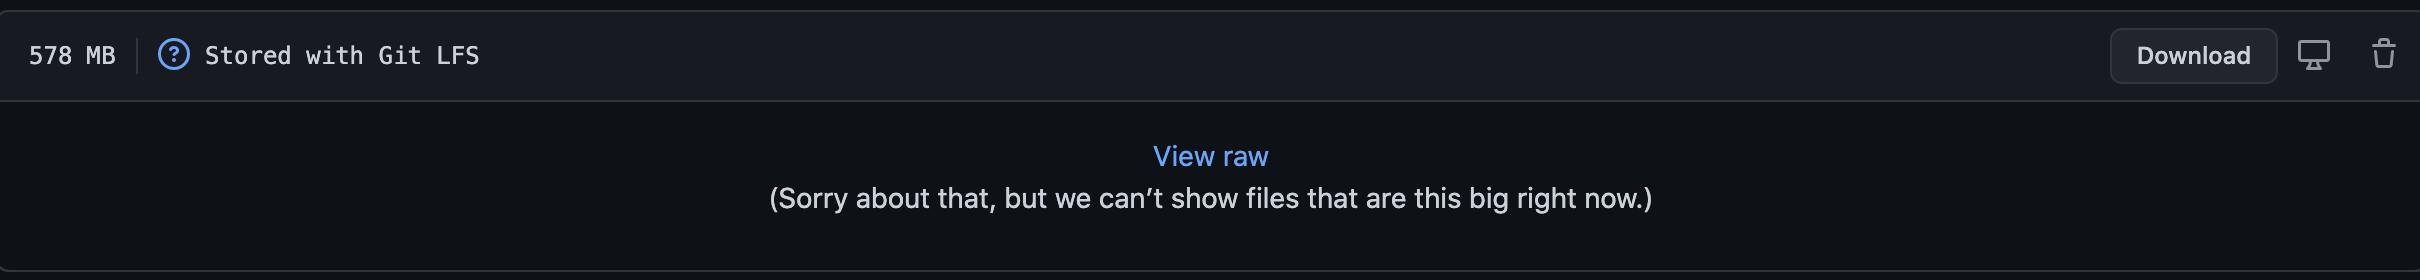

**Note: If you want to transfer already existing files in your git to LFS(or vice-versa) you should use `git lfs migrate` Refer to [docs](https://github.com/git-lfs/git-lfs/blob/main/docs/man/git-lfs-migrate.1.ronn)**

## Fetching LFS data

Reclone the repo, to test a demo of accessing LFS data.

In [ ]:
%cd /content/

/content


In [ ]:
!rm -rf $repo # remove any old copies of this directory
cmd = f"git clone https://github.com/{username}/{repo}.git"
utils.git_ssh(cmd, email=email, username=username, verbose=True)
%cd /content/$repo

executing command via ssh: git clone git@github.com:always-newbie161/LFS-data.git
Copying keys from gdrive to local VM
Executing git commands
Cleanup local VM
/content/LFS-data


In [ ]:
!git lfs ls-files --all

`lfs.fetchinclude` and `lfs.fetchexclude` can be used to set the config to control what lfs files to fetch and what to ignore.

Here we are including only the `.pt` files in `lfs_data` directory.

In [ ]:
!git config lfs.fetchinclude "lfs_data/*.pt"

`git lfs pull` downloads the git LFS objects and updates the current working tree with these files (by default pull downloads from the default remote(origin here)).

Note: you have `git lfs pull` to access the LFS objects in your local rpeository.

In [ ]:
cmd = "git lfs pull"
utils.git_ssh(cmd, email=email, username=username, verbose=True)

executing command via ssh: git lfs pull
Copying keys from gdrive to local VM
Executing git commands
Cleanup local VM


### Loading the model

In [ ]:
import torch

model = torch.load(f"/content/{repo}/lfs_data/resnet101_model.pt")

In [ ]:
print(model.state_dict().keys())

odict_keys(['conv1.weight', 'bn1.weight', 'bn1.bias', 'bn1.running_mean', 'bn1.running_var', 'bn1.num_batches_tracked', 'layer1.0.conv1.weight', 'layer1.0.bn1.weight', 'layer1.0.bn1.bias', 'layer1.0.bn1.running_mean', 'layer1.0.bn1.running_var', 'layer1.0.bn1.num_batches_tracked', 'layer1.0.conv2.weight', 'layer1.0.bn2.weight', 'layer1.0.bn2.bias', 'layer1.0.bn2.running_mean', 'layer1.0.bn2.running_var', 'layer1.0.bn2.num_batches_tracked', 'layer1.0.conv3.weight', 'layer1.0.bn3.weight', 'layer1.0.bn3.bias', 'layer1.0.bn3.running_mean', 'layer1.0.bn3.running_var', 'layer1.0.bn3.num_batches_tracked', 'layer1.0.downsample.0.weight', 'layer1.0.downsample.1.weight', 'layer1.0.downsample.1.bias', 'layer1.0.downsample.1.running_mean', 'layer1.0.downsample.1.running_var', 'layer1.0.downsample.1.num_batches_tracked', 'layer1.1.conv1.weight', 'layer1.1.bn1.weight', 'layer1.1.bn1.bias', 'layer1.1.bn1.running_mean', 'layer1.1.bn1.running_var', 'layer1.1.bn1.num_batches_tracked', 'layer1.1.conv2.we